In [4]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
#Import train data

train_data = pd.read_csv("train.csv")
train_data.head()

C:\Users\jt23644\AppData\Local\Temp\ipykernel_16796\3101864932.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
#Import test data

test_data = pd.read_csv("test.csv")
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
#Import store data

store_data = pd.read_csv("store.csv")
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


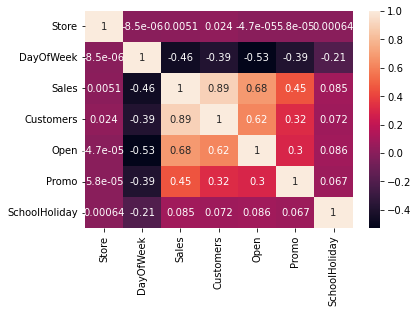

In [8]:
#Generate correlation heatmap for train data

sns.heatmap(train_data.corr(), annot = True)
plt.show()

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

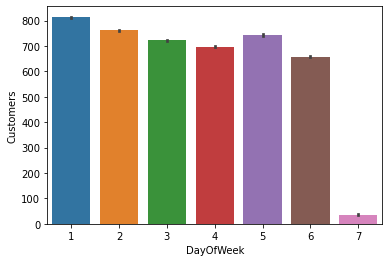

In [9]:
#Plotting a bar graph for DayOfWeek VS Customers, where 1 - Monday, 2 - Tuesday and so on 7-Sunday

sns.barplot(x = "DayOfWeek", y = "Customers", data = train_data)

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

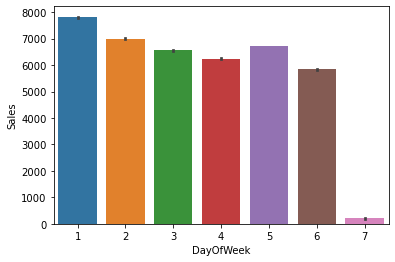

In [10]:
#Plotting a bar graph for DayOfWeek VS Sales, where 1 - Monday, 2 - Tuesday and so on 7-Sunday

sns.barplot(x = "DayOfWeek", y = "Sales", data = train_data)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

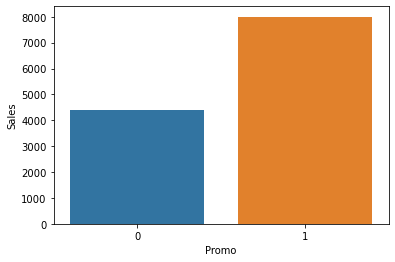

In [11]:
#Plotting a bar graph for Promo VS Sales

sns.barplot(x = "Promo", y = "Sales", data = train_data)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

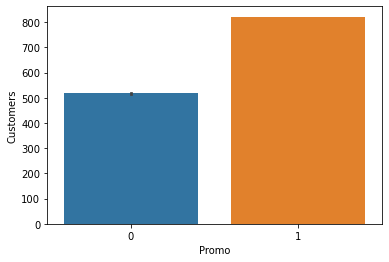

In [16]:
#Plotting a bar graph for Promo VS Customers

sns.barplot(x = "Promo", y = "Customers", data = train_data)

<AxesSubplot:xlabel='Open', ylabel='Sales'>

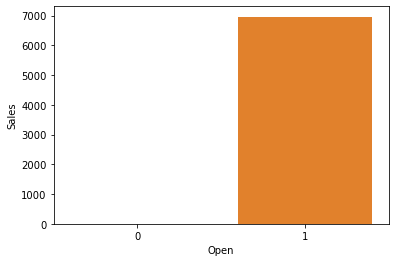

In [13]:
#Plotting a bar graph for Open VS Sales

sns.barplot(x = "Open", y = "Sales", data = train_data)

In [9]:
#checking the different values available in StateHoliday attribute for train data

train_data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [10]:
#checking the different values available in StateHoliday attribute for test data

test_data.StateHoliday.unique()

array(['0', 'a'], dtype=object)

In [11]:
#Converting numeric data type to string for performing further operations

train_data["StateHoliday"] = train_data["StateHoliday"].replace(0,"0")

In [12]:
#Mapping the different types of holidays to 1 and non holiday to 0

train_data["StateHoliday"] = train_data["StateHoliday"].map({"0":0, "a":1, "b":1, "c":1})
test_data["StateHoliday"] = test_data["StateHoliday"].map({"0":0, "a":1, "b":1, "c":1})

In [13]:
#train_data.head()

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

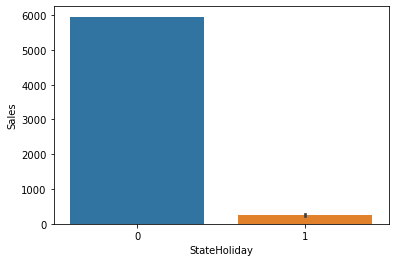

In [14]:
#Plotting a bar graph for StateHoliday VS Sales

sns.barplot(x = "StateHoliday", y = "Sales", data = train_data)

<AxesSubplot:xlabel='SchoolHoliday', ylabel='count'>

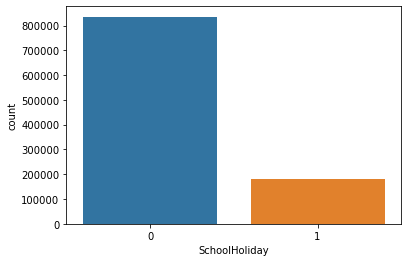

In [21]:
#To get the count of stores which were affected by School Closures

sns.countplot(x = "SchoolHoliday", data = train_data)

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

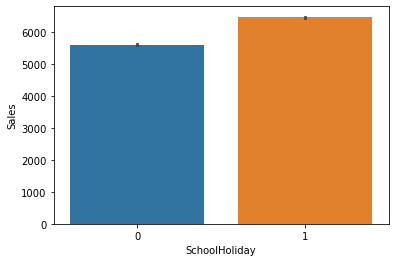

In [22]:
#Plotting a bar graph for SchoolHoliday VS Sales

sns.barplot(x = "SchoolHoliday", y = "Sales", data = train_data)

In [15]:
#checking for null values in train data

train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [16]:
#Checking for null values in store data

store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [17]:
# Using zero to fill missing values in the 'store' dataset produces superior outcomes when compared to employing the median()
store_data.fillna(0, inplace=True)

In [18]:
#Checking for null values in store data after treating them

store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [19]:
#Check for null values in test dataset

test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [20]:
# For the test, we assume that the stores are operational and assign the value 1 to cells where there is no information available.
test_data.fillna(1, inplace=True)

In [21]:
#checking for null values in test data after treating them

test_data.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [22]:
#merging store dataset with train dataset

df = pd.merge(left = train_data, right = store_data, how = 'outer', on = 'Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


<AxesSubplot:>

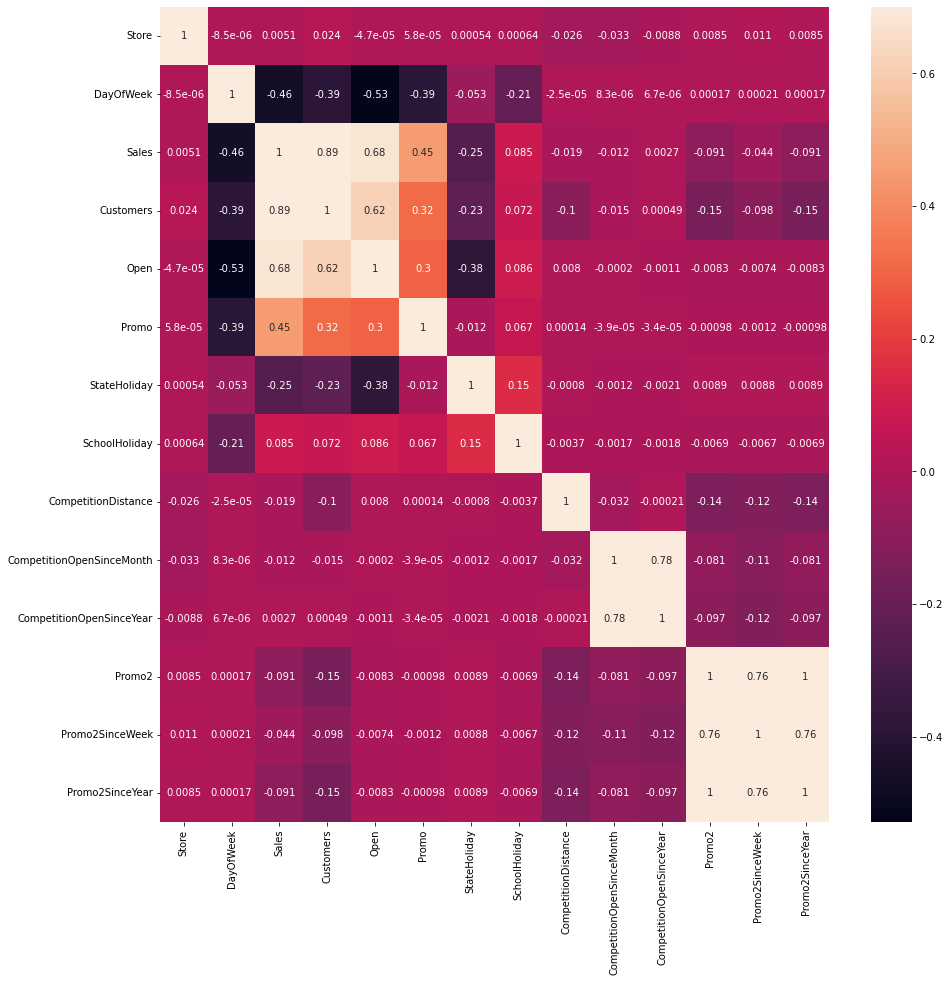

In [23]:
#Creating correlation heatmap after merging data.

plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),vmax=0.7, cbar = True, annot = True)

In [24]:
#checking for null values in the data frame after merging train and store

df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [25]:
# checking for dulpicates
df.duplicated().sum()


0

In [26]:
#getting count before removing duplicates
df.count()

Store                        1017209
DayOfWeek                    1017209
Date                         1017209
Sales                        1017209
Customers                    1017209
Open                         1017209
Promo                        1017209
StateHoliday                 1017209
SchoolHoliday                1017209
StoreType                    1017209
Assortment                   1017209
CompetitionDistance          1017209
CompetitionOpenSinceMonth    1017209
CompetitionOpenSinceYear     1017209
Promo2                       1017209
Promo2SinceWeek              1017209
Promo2SinceYear              1017209
PromoInterval                1017209
dtype: int64

In [27]:
#removing duplicates if there is any

df=df.drop_duplicates()

In [28]:
#checking count after removing duplicates

df.count()

Store                        1017209
DayOfWeek                    1017209
Date                         1017209
Sales                        1017209
Customers                    1017209
Open                         1017209
Promo                        1017209
StateHoliday                 1017209
SchoolHoliday                1017209
StoreType                    1017209
Assortment                   1017209
CompetitionDistance          1017209
CompetitionOpenSinceMonth    1017209
CompetitionOpenSinceYear     1017209
Promo2                       1017209
Promo2SinceWeek              1017209
Promo2SinceYear              1017209
PromoInterval                1017209
dtype: int64

In [29]:
#Dataframe before separating date field.

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [38]:
#Extract All the date Features

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.week

C:\Users\jt23644\AppData\Local\Temp\ipykernel_12048\3818730998.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df["Date"].dt.week


In [39]:
#Dataframe after separating date field.

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,27,31


In [40]:
#Extract All the date Features in test data

test_data['Date'] = pd.to_datetime(test_data['Date'], infer_datetime_format=True)
test_data["Month"] = test_data["Date"].dt.month
test_data["Quarter"] = test_data["Date"].dt.quarter
test_data["Year"] = test_data["Date"].dt.year
test_data["Day"] = test_data["Date"].dt.day
test_data["Week"] = test_data["Date"].dt.week

C:\Users\jt23644\AppData\Local\Temp\ipykernel_12048\615471148.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_data["Week"] = test_data["Date"].dt.week


In [30]:
#Sales attribute before normalizing

df['Sales'].head()

0    5263
1    5020
2    4782
3    5011
4    6102
Name: Sales, dtype: int64

In [42]:
#normalizing sales attribute in the dataframe

mms = MinMaxScaler(feature_range=(0,1))
df['Sales'] = mms.fit_transform(df[['Sales']])

In [43]:
#Sales attribute after normalizing

df['Sales'].head()

0    0.126664
1    0.120815
2    0.115087
3    0.120599
4    0.146856
Name: Sales, dtype: float64

In [44]:
#code for denormalization

#df['Sales'] = mms.inverse_transform(df['Sales'])

In [45]:
#Data before converting DayOfWeek into categorical type
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week
0,1,5,2015-07-31,0.126664,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,31,31
1,1,4,2015-07-30,0.120815,546,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,30,31
2,1,3,2015-07-29,0.115087,523,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,29,31
3,1,2,2015-07-28,0.120599,560,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,28,31
4,1,1,2015-07-27,0.146856,612,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,3,2015,27,31


In [31]:
#converting DayOfWeek into categorical type

train_dummies = pd.get_dummies(train_data['DayOfWeek'], prefix = 'Day')
train_dummies.drop(['Day_7'], axis=1, inplace=True)
train_data = train_data.join(train_dummies)

In [32]:
train_dummies = pd.get_dummies(train_data['DayOfWeek'], prefix = 'Day')
df = df.join(train_dummies)

In [33]:
#Data after converting DayOfWeek into categorical type
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0.0,0.0,0,0,0,0,0,1,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0.0,0.0,0,0,0,0,0,1,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0.0,0.0,0,0,0,0,0,1,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0.0,0.0,0,0,0,0,0,1,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0.0,0.0,0,0,0,0,0,1,0,0


In [34]:
#converting DayOfWeek attribute in test data to categorical type
test_dummies = pd.get_dummies(test_data['DayOfWeek'], prefix = 'Day')
test_data = test_data.join(test_dummies)

In [35]:
#test data after converting DayOfWeek into categorical type
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7
0,1,1,4,2015-09-17,1.0,1,0,0,0,0,0,1,0,0,0
1,2,3,4,2015-09-17,1.0,1,0,0,0,0,0,1,0,0,0
2,3,7,4,2015-09-17,1.0,1,0,0,0,0,0,1,0,0,0
3,4,8,4,2015-09-17,1.0,1,0,0,0,0,0,1,0,0,0
4,5,9,4,2015-09-17,1.0,1,0,0,0,0,0,1,0,0,0


In [50]:
#dropping DayOfWeek attribute from test_data and train data
df.drop(['DayOfWeek'], axis=1,inplace=True)
test_data.drop(['DayOfWeek'], axis =1, inplace = True)

In [51]:
df.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Year,Day,Week,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7
0,1,2015-07-31,0.126664,555,1,1,0,1,c,a,...,2015,31,31,0,0,0,0,1,0,0
1,1,2015-07-30,0.120815,546,1,1,0,1,c,a,...,2015,30,31,0,0,0,1,0,0,0
2,1,2015-07-29,0.115087,523,1,1,0,1,c,a,...,2015,29,31,0,0,1,0,0,0,0
3,1,2015-07-28,0.120599,560,1,1,0,1,c,a,...,2015,28,31,0,1,0,0,0,0,0
4,1,2015-07-27,0.146856,612,1,1,0,1,c,a,...,2015,27,31,1,0,0,0,0,0,0


In [52]:
df.columns

Index(['Store', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Month',
       'Quarter', 'Year', 'Day', 'Week', 'Day_1', 'Day_2', 'Day_3', 'Day_4',
       'Day_5', 'Day_6', 'Day_7'],
      dtype='object')

In [36]:
#drop Day_7 from the dataframe as from the EDA it is found that the sales on Day_7 is very very less compared to other days.

df.drop(['Day_7'], axis =1, inplace = True)

In [37]:
#for training selecting only those attributes which have good correlation with sales and ingoring other attributes that have very less correlation with sales

x_train = df.drop(['Sales','Store','Date','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis =1)
y_train = df['Sales'].astype(float)

In [38]:
x_train.head()

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,5,555,1,1,0,1,0,0,0,0,1,0
1,4,546,1,1,0,1,0,0,0,0,1,0
2,3,523,1,1,0,1,0,0,0,0,1,0
3,2,560,1,1,0,1,0,0,0,0,1,0
4,1,612,1,1,0,1,0,0,0,0,1,0


In [40]:
x_train = x_train.drop(['Customers', 'DayOfWeek'], axis = 1)
x_train.head()

,Open,Promo,StateHoliday,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,1,1,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,1,0


In [45]:
#Dropping ID and store attribute from test data as they don't have significant impact on the sales attribute

x_test = test_data.drop(["Id","Store","Date", "DayOfWeek", "Day_7"],axis=1)

In [46]:
x_test.head()

,Open,Promo,StateHoliday,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,1.0,1,0,0,0,0,0,1,0,0
1,1.0,1,0,0,0,0,0,1,0,0
2,1.0,1,0,0,0,0,0,1,0,0
3,1.0,1,0,0,0,0,0,1,0,0
4,1.0,1,0,0,0,0,0,1,0,0


In [47]:
x_train = x_train.to_numpy()
x_train.shape
x_train =  x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_train.shape

(1017209, 1, 10)

In [48]:
def RMSE(test, pred):
    return K.sqrt(K.mean(K.square(pred - test)))

In [49]:
from keras import backend as K

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

regressor = Sequential()

regressor.add(
    LSTM(32,recurrent_activation="sigmoid",  
         return_sequences = True, 
         input_shape = (1,x_train.shape[2])
        )
)

regressor.add(LSTM(units = 32, return_sequences = True))

regressor.add(LSTM(units = 32, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(Dense(1, activation='relu'))

regressor.compile(optimizer = 'adam', loss = RMSE)
batch_size= 64
history = regressor.fit(x_train, y_train, batch_size= 10, epochs=7)



Epoch 1/7

101721/101721 [==============================] - 214s 2ms/step - loss: 5760.7700
Epoch 2/7
101721/101721 [==============================] - 214s 2ms/step - loss: 3868.2234
Epoch 3/7
101721/101721 [==============================] - 211s 2ms/step - loss: 2809.9116
Epoch 4/7
101721/101721 [==============================] - 211s 2ms/step - loss: 2677.3118
Epoch 5/7
101721/101721 [==============================] - 211s 2ms/step - loss: 2675.6455
Epoch 6/7
101721/101721 [==============================] - 210s 2ms/step - loss: 2676.2632
Epoch 7/7
101721/101721 [==============================] - 212s 2ms/step - loss: 2675.5085


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [1]:
import tensorflow

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-1.1.0-py2.py3-none-any.whl (19 kB)
  Using cached google_auth-2.25.1-py2.py3-none-any.whl (184 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.w

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.25.1 which is incom

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [51]:
def plot_train_val(history, matrices, path=0, title='Binary Model'):
    
    print(history.history.keys())
    
    for matrice in matrices:
        plt.plot(history.history[matrice])
        #plt.title(title("RMSE Plot"))
        plt.xlabel(matrice)
        plt.ylabel('epoch')
        plt.show()

dict_keys(['loss'])


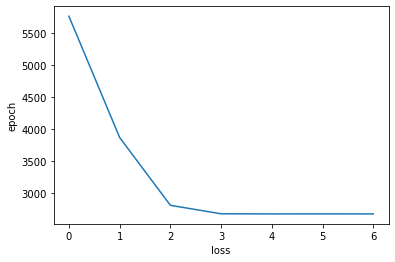

In [52]:
plot_train_val(history, ['loss'], path=0, title = 'RMSE')

dict_keys(['loss'])


TypeError: 'str' object is not callable

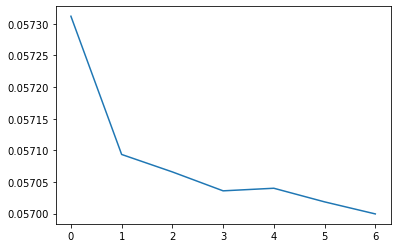

In [81]:
plot_train_val(history, ['loss'], path=0, title = 'RMSE')

In [93]:
#train_data.drop(['Customers'], axis = 1, inplace = True)
train_data['Open'] = train_data['Open'].astype(float)
train_data.drop(['DayOfWeek'], axis=1, inplace=True)

In [92]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,1,5,2015-07-31,5263,1,1,0,1,0,0,0,0,1,0
1,2,5,2015-07-31,6064,1,1,0,1,0,0,0,0,1,0
2,3,5,2015-07-31,8314,1,1,0,1,0,0,0,0,1,0
3,4,5,2015-07-31,13995,1,1,0,1,0,0,0,0,1,0
4,5,5,2015-07-31,4822,1,1,0,1,0,0,0,0,1,0


In [94]:
x_train = train_data.drop(["Sales", "Store","Date"], axis = 1)
y_train = train_data["Sales"].astype(float)

In [97]:
#train_data.drop(['Customers'], axis = 1, inplace = True)
train_data['Open'] = train_data['Open'].astype(float)
train_data.drop(['DayOfWeek'], axis=1, inplace=True)

KeyError: "['DayOfWeek'] not found in axis"

dict_keys(['loss'])


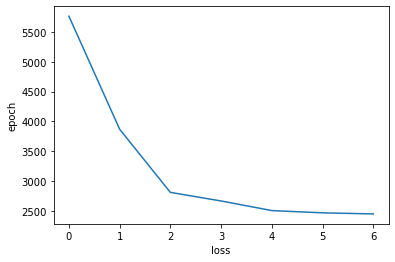

In [103]:
plot_train_val(history, ['loss'], path=0, title = 'RMSE')

In [55]:
prediction = regressor.predict(x_test)

1284/1284 [==============================] - 2s 868us/step


In [60]:
type(prediction)

numpy.ndarray

In [65]:
prediction.shape


(41088, 1, 1)

In [59]:
pred = pd.DataFrame(prediction, columns = ['Sales'])

ValueError: Must pass 2-d input. shape=(41088, 1, 1)

In [ ]:
Final_submission = pd.concat([test['Id'], pred], axis = 1)

In [ ]:
Finalsubmission.to_csv('TestSubmission.csv', index=False)

In [54]:
x_test = x_test.to_numpy()
x_test.shape
x_test =  x_test.reshape(x_test.shape[0],1,x_test.shape[1])
x_test.shape

(41088, 1, 10)

In [68]:
regressor = Sequential()

regressor.add(
    LSTM(32,recurrent_activation="sigmoid",  
         return_sequences = True, 
         input_shape = (1,x_train.shape[2])
        )
)

regressor.add(LSTM(units = 32, return_sequences = True))

#regressor.add(LSTM(units = 32, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(Dense(1, activation='relu'))

regressor.compile(optimizer = 'adam', loss = RMSE)
batch_size= 64
history = regressor.fit(x_train, y_train, batch_size= 10, epochs=7)

Epoch 1/7
101721/101721 [==============================] - 166s 2ms/step - loss: 5760.2295
Epoch 2/7
101721/101721 [==============================] - 167s 2ms/step - loss: 3868.8977
Epoch 3/7
101721/101721 [==============================] - 164s 2ms/step - loss: 2808.9819
Epoch 4/7
101721/101721 [==============================] - 160s 2ms/step - loss: 2677.4504
Epoch 5/7
101721/101721 [==============================] - 160s 2ms/step - loss: 2676.0171
Epoch 6/7
101721/101721 [==============================] - 161s 2ms/step - loss: 2675.6772
Epoch 7/7
101721/101721 [==============================] - 161s 2ms/step - loss: 2675.9160


In [69]:
prediction2 = regressor.predict(x_test)

1284/1284 [==============================] - 1s 761us/step
